In [161]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sb


# Study data files
Incidence_metadata = "Resource/New Cancer/incd_statewise.csv"
Death_metadata = "Resource/Cancer death/death_statewise.csv"
#Incidence_metadata="Users/Rupesh/Downloads/incd (4).csv"

Incidence_metadata = pd.read_csv(Incidence_metadata,skiprows=8)
Incidence_dropped = Incidence_metadata.dropna()

Incidence_dropped.head()


,State,FIPS,Met Healthy People Objective of ***?,"Age-Adjusted Incidence Rate(Ü) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (á) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,"US (SEER+NPCR)(1,10)",0.0,***,448.0,447.7,448.4,1638110.0,falling,-0.9,-1.6,-0.1
1,"Kentucky(7,8)",21000.0,***,520.9,518.1,523.7,26945.0,stable,-0.1,-0.3,0.0
2,"Delaware(6,10)",10000.0,***,498.4,492.6,504.3,5803.0,stable,-0.9,-2.3,0.5
3,"Pennsylvania(6,10)",42000.0,***,487.0,485.4,488.6,79060.0,stable,-0.3,-1.1,0.5
4,"New Hampshire(6,10)",33000.0,***,483.5,478.7,488.4,8129.0,stable,-0.8,-2.1,0.5


In [162]:
Incidence_dropped_clean= Incidence_dropped.drop([" FIPS","Met Healthy People Objective of ***?"], axis=1)
Incidence_dropped_US= Incidence_dropped_clean.drop(0)
Incidence_dropped_US.head()

,State,"Age-Adjusted Incidence Rate(Ü) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (á) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
1,"Kentucky(7,8)",520.9,518.1,523.7,26945.0,stable,-0.1,-0.3,0.0
2,"Delaware(6,10)",498.4,492.6,504.3,5803.0,stable,-0.9,-2.3,0.5
3,"Pennsylvania(6,10)",487.0,485.4,488.6,79060.0,stable,-0.3,-1.1,0.5
4,"New Hampshire(6,10)",483.5,478.7,488.4,8129.0,stable,-0.8,-2.1,0.5
5,"New Jersey(7,8)",483.3,481.4,485.2,50921.0,falling,-7.9,-11.1,-4.5


In [163]:
Incidence_dropped_US["State"]= Incidence_dropped_US["State"].str.replace(r"\(.*\)","")
Incidence_dropped_US.head()


,State,"Age-Adjusted Incidence Rate(Ü) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (á) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
1,Kentucky,520.9,518.1,523.7,26945.0,stable,-0.1,-0.3,0.0
2,Delaware,498.4,492.6,504.3,5803.0,stable,-0.9,-2.3,0.5
3,Pennsylvania,487.0,485.4,488.6,79060.0,stable,-0.3,-1.1,0.5
4,New Hampshire,483.5,478.7,488.4,8129.0,stable,-0.8,-2.1,0.5
5,New Jersey,483.3,481.4,485.2,50921.0,falling,-7.9,-11.1,-4.5


In [164]:
Final_Incidence_data = Incidence_dropped_US.rename(columns={"Age-Adjusted Incidence Rate(Ü) - cases per 100,000": "Incidence Rate", "Recent 5-Year Trend (á) in Incidence Rates": "Trend"})
Final_Incidence_data.head()

,State,Incidence Rate,Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Trend,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
1,Kentucky,520.9,518.1,523.7,26945.0,stable,-0.1,-0.3,0.0
2,Delaware,498.4,492.6,504.3,5803.0,stable,-0.9,-2.3,0.5
3,Pennsylvania,487.0,485.4,488.6,79060.0,stable,-0.3,-1.1,0.5
4,New Hampshire,483.5,478.7,488.4,8129.0,stable,-0.8,-2.1,0.5
5,New Jersey,483.3,481.4,485.2,50921.0,falling,-7.9,-11.1,-4.5


In [165]:
Death_metadata = "Resource/Cancer death/death_statewise.csv"
Death_metadata = pd.read_csv(Death_metadata,skiprows=8)
Death_dropped = Death_metadata.dropna()
Death_dropped.head()

,State,FIPS,Met Healthy People Objective of 161.4?,"Age-Adjusted Death Rate(Ü) - deaths per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (á) in Death Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,United States,0.0,Yes,161.0,160.8,161.1,590623.0,falling,-1.5,-1.6,-1.5
1,Kentucky,21000.0,No,197.9,196.2,199.7,10206.0,falling,-1.1,-1.2,-0.9
2,Mississippi,28000.0,No,193.6,191.5,195.8,6522.0,falling,-1.0,-1.1,-0.9
3,West Virginia,54000.0,No,189.4,187.0,191.9,4756.0,falling,-1.0,-1.1,-0.9
4,Arkansas,5000.0,No,185.2,183.1,187.2,6623.0,falling,-1.1,-1.4,-0.9


In [166]:
Death_dropped_clean= Death_dropped.drop([" FIPS","Met Healthy People Objective of 161.4?"], axis=1)
Death_dropped_US= Death_dropped_clean.drop(0)
Death_dropped_US.head()

,State,"Age-Adjusted Death Rate(Ü) - deaths per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (á) in Death Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
1,Kentucky,197.9,196.2,199.7,10206.0,falling,-1.1,-1.2,-0.9
2,Mississippi,193.6,191.5,195.8,6522.0,falling,-1.0,-1.1,-0.9
3,West Virginia,189.4,187.0,191.9,4756.0,falling,-1.0,-1.1,-0.9
4,Arkansas,185.2,183.1,187.2,6623.0,falling,-1.1,-1.4,-0.9
5,Tennessee,184.0,182.6,185.3,14111.0,falling,-1.3,-1.4,-1.2


In [167]:
Final_Death_data = Death_dropped_US.rename(columns={"Age-Adjusted Death Rate(Ü) - deaths per 100,000": "Death Rate",
                                                    "Recent 5-Year Trend (á) in Death Rates": "Trend"})
Final_Death_data.head()

,State,Death Rate,Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Trend,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
1,Kentucky,197.9,196.2,199.7,10206.0,falling,-1.1,-1.2,-0.9
2,Mississippi,193.6,191.5,195.8,6522.0,falling,-1.0,-1.1,-0.9
3,West Virginia,189.4,187.0,191.9,4756.0,falling,-1.0,-1.1,-0.9
4,Arkansas,185.2,183.1,187.2,6623.0,falling,-1.1,-1.4,-0.9
5,Tennessee,184.0,182.6,185.3,14111.0,falling,-1.3,-1.4,-1.2


In [168]:
combined_cancer_data = pd.merge(Final_Incidence_data, Final_Death_data, how="left", on= "State")
combined_cancer_data.head()

,State,Incidence Rate,Lower 95% Confidence Interval_x,Upper 95% Confidence Interval_x,Average Annual Count_x,Recent Trend_x,Trend_x,Lower 95% Confidence Interval.1_x,Upper 95% Confidence Interval.1_x,Death Rate,Lower 95% Confidence Interval_y,Upper 95% Confidence Interval_y,Average Annual Count_y,Recent Trend_y,Trend_y,Lower 95% Confidence Interval.1_y,Upper 95% Confidence Interval.1_y
0,Kentucky,520.9,518.1,523.7,26945.0,stable,-0.1,-0.3,0.0,197.9,196.2,199.7,10206.0,falling,-1.1,-1.2,-0.9
1,Delaware,498.4,492.6,504.3,5803.0,stable,-0.9,-2.3,0.5,169.6,166.2,173.0,1989.0,falling,-1.6,-1.7,-1.4
2,Pennsylvania,487.0,485.4,488.6,79060.0,stable,-0.3,-1.1,0.5,169.0,168.1,169.9,28658.0,falling,-1.5,-1.5,-1.4
3,New Hampshire,483.5,478.7,488.4,8129.0,stable,-0.8,-2.1,0.5,162.0,159.3,164.9,2718.0,falling,-1.5,-1.6,-1.3
4,New Jersey,483.3,481.4,485.2,50921.0,falling,-7.9,-11.1,-4.5,153.5,152.4,154.6,16407.0,falling,-2.1,-2.2,-2.0


In [169]:
final_combined_cancer_data = combined_cancer_data.drop(["Lower 95% Confidence Interval_x",
"Upper 95% Confidence Interval_x","Recent Trend_x", "Trend_x","Lower 95% Confidence Interval.1_x", 
"Upper 95% Confidence Interval.1_x","Lower 95% Confidence Interval_y","Upper 95% Confidence Interval_y",
"Recent Trend_y", "Trend_y", "Lower 95% Confidence Interval.1_y", "Upper 95% Confidence Interval.1_y"], axis=1)
final_combined_cancer_data=final_combined_cancer_data.dropna()
final_combined_cancer_data.sort_values('Incidence Rate')
 
final_combined_cancer_data.head()

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y
0,Kentucky,520.9,26945.0,197.9,10206.0
1,Delaware,498.4,5803.0,169.6,1989.0
2,Pennsylvania,487.0,79060.0,169.0,28658.0
3,New Hampshire,483.5,8129.0,162.0,2718.0
4,New Jersey,483.3,50921.0,153.5,16407.0


In [170]:
export_csv = final_combined_cancer_data.to_csv (r'Resource/final_combined_cancer_data.csv', index = None, header=True)

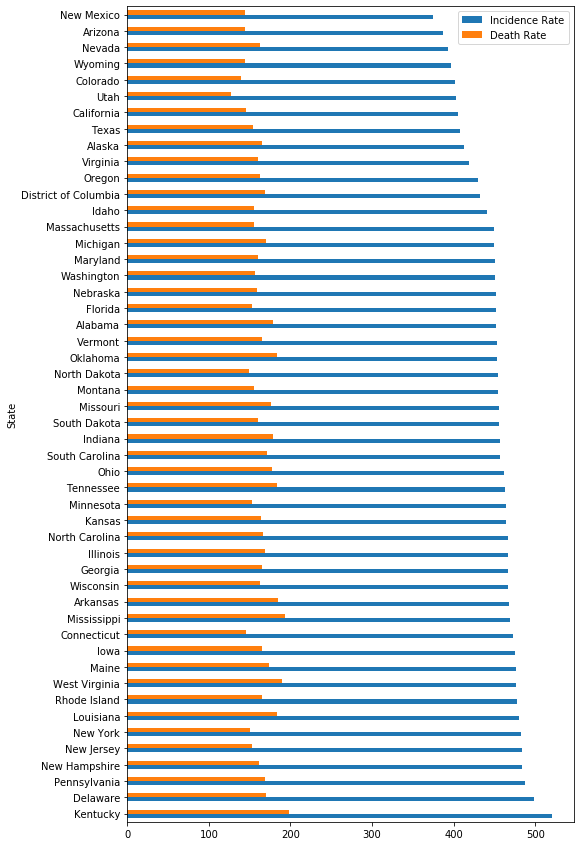

In [171]:

bx= final_combined_cancer_data.set_index('State')
ax= bx[['Incidence Rate','Death Rate']].plot(kind="barh", figsize=(8,15))



In [172]:
x_axis= final_combined_cancer_data["Incidence Rate"] 
y_axis= final_combined_cancer_data["Death Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between both factors is {round(correlation[0],2)}")


The pearson correlation between both factors is 0.59


In [183]:

final_combined_cancer_data['Cancer Death_per_hundred_cancer_patient']= 100*(final_combined_cancer_data['Average Annual Count_y'].div(final_combined_cancer_data['Average Annual Count_x'].values,axis=0))
Rounded_data= round(final_combined_cancer_data,0)                                
Rounded_data.head()                               

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
0,Kentucky,521.0,26945.0,198.0,10206.0,38.0
1,Delaware,498.0,5803.0,170.0,1989.0,34.0
2,Pennsylvania,487.0,79060.0,169.0,28658.0,36.0
3,New Hampshire,484.0,8129.0,162.0,2718.0,33.0
4,New Jersey,483.0,50921.0,154.0,16407.0,32.0


In [185]:
export_csv = Rounded_data.to_csv (r'Resource/Added_final_combined_cancer_data.csv', index = None, header=True)

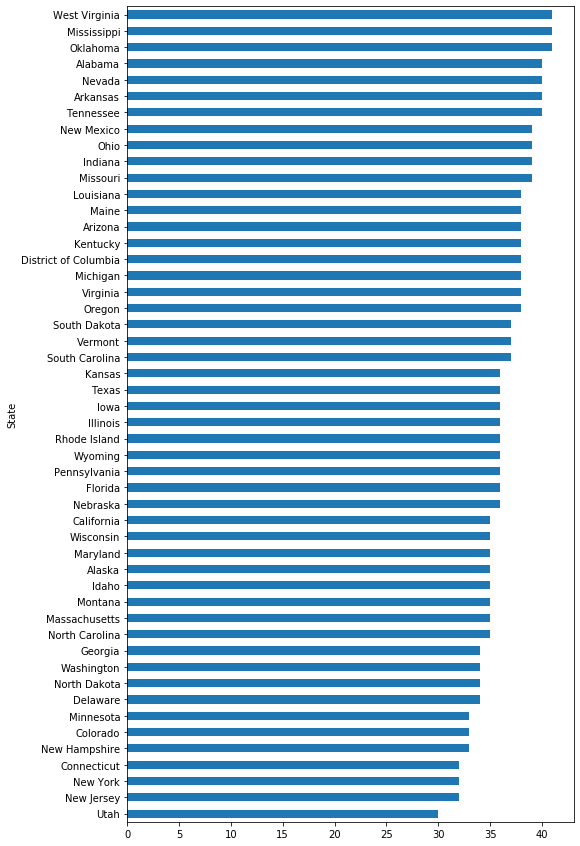

In [186]:
bx= Rounded_data.set_index('State')
cx= bx.sort_values("Cancer Death_per_hundred_cancer_patient")                                
 
ax= cx['Cancer Death_per_hundred_cancer_patient'].plot(kind="barh", figsize=(8,15))

In [187]:
pearsoncorr = Rounded_data.corr(method='pearson')
pearsoncorr

,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
Incidence Rate,1.000000,-0.021789,0.593269,-0.030054,-0.045042
Average Annual Count_x,-0.021789,1.000000,-0.147511,0.997122,-0.146855
Death Rate,0.593269,-0.147511,1.000000,-0.109428,0.710124
Average Annual Count_y,-0.030054,0.997122,-0.109428,1.000000,-0.091903
Cancer Death_per_hundred_cancer_patient,-0.045042,-0.146855,0.710124,-0.091903,1.000000


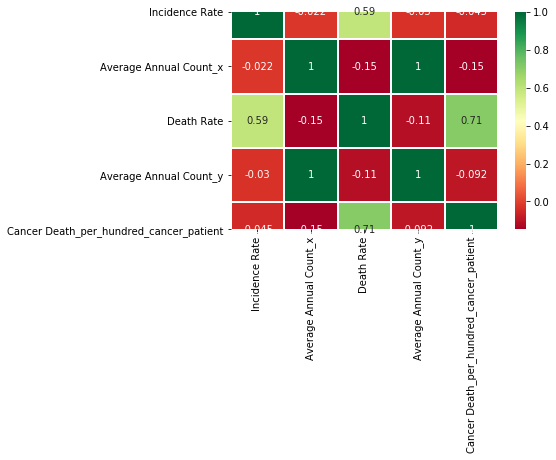

In [188]:
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdYlGn',
            annot=True,
            linewidth=1.0)